## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [5]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## 1. Carga datos y representa la serie

In [7]:
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'], index_col='date')

In [8]:
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


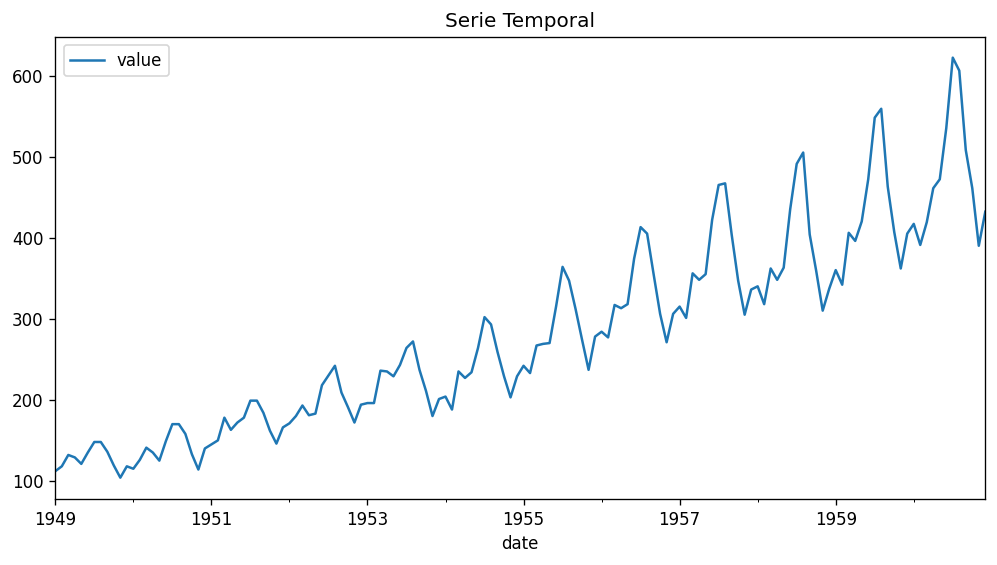

In [10]:
df.plot(title='Serie Temporal', figsize=(10, 5))
plt.show()

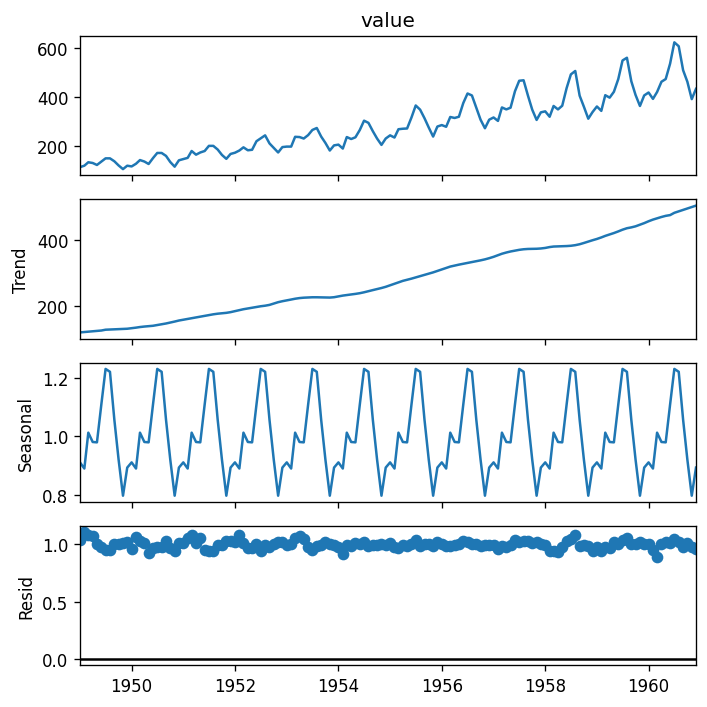

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

Deducimos que seasonality de 12 (anual)

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

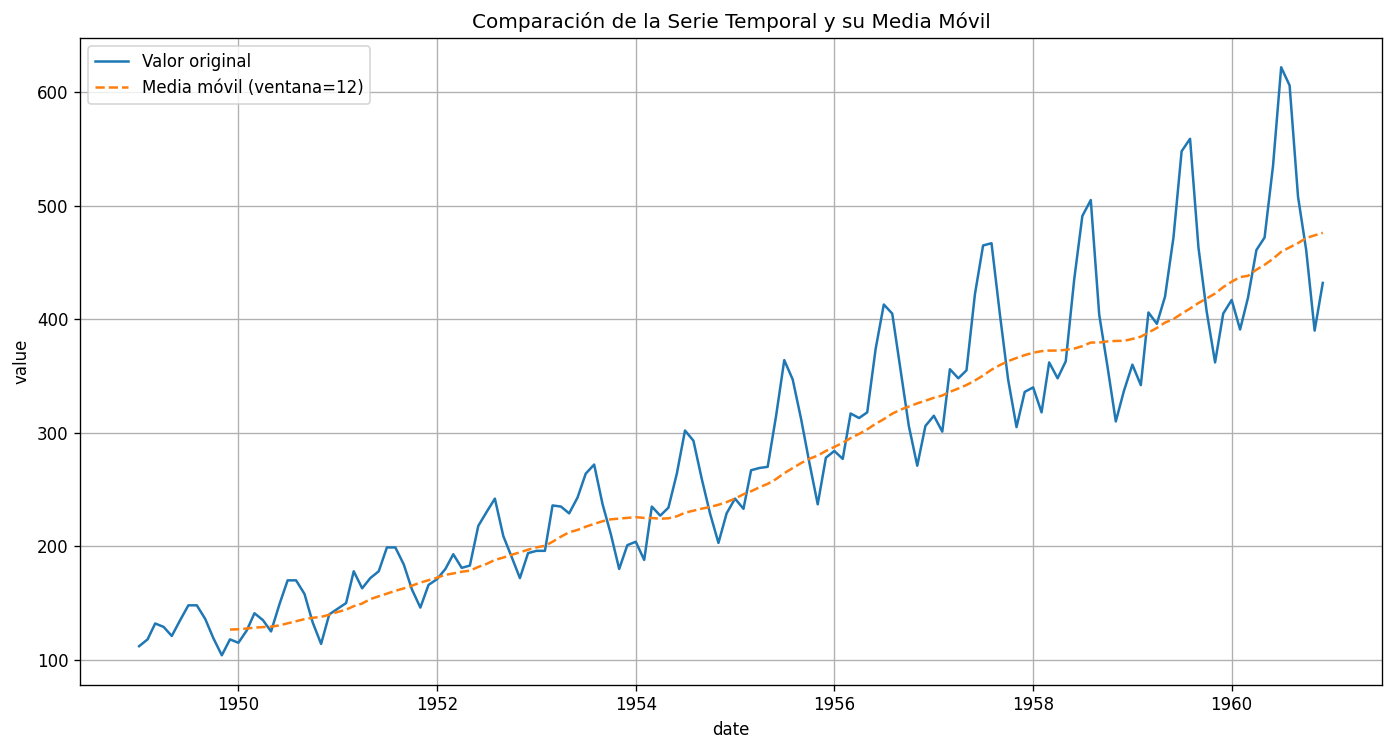

In [ ]:
df['media'] = df['value'].rolling(window=12).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='Valor original')
plt.plot(df.index, df['media'], label=f'Media móvil (ventana={12})', linestyle='--')

plt.title('Comparación de la Serie Temporal y su Media Móvil')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.grid(True);

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(df['value'].values)

In [ ]:
print("Estadístico de la prueba ADF:", result[0])
print("Valor p:", result[1])

Estadístico de la prueba ADF: 0.8153688792060482
Valor p: 0.991880243437641


No es estacionaria (p>0.5)

## 4. Aplica una transformación logarítmica

In [ ]:
df['Log_Valor'] = np.log(df['value'] + 1)

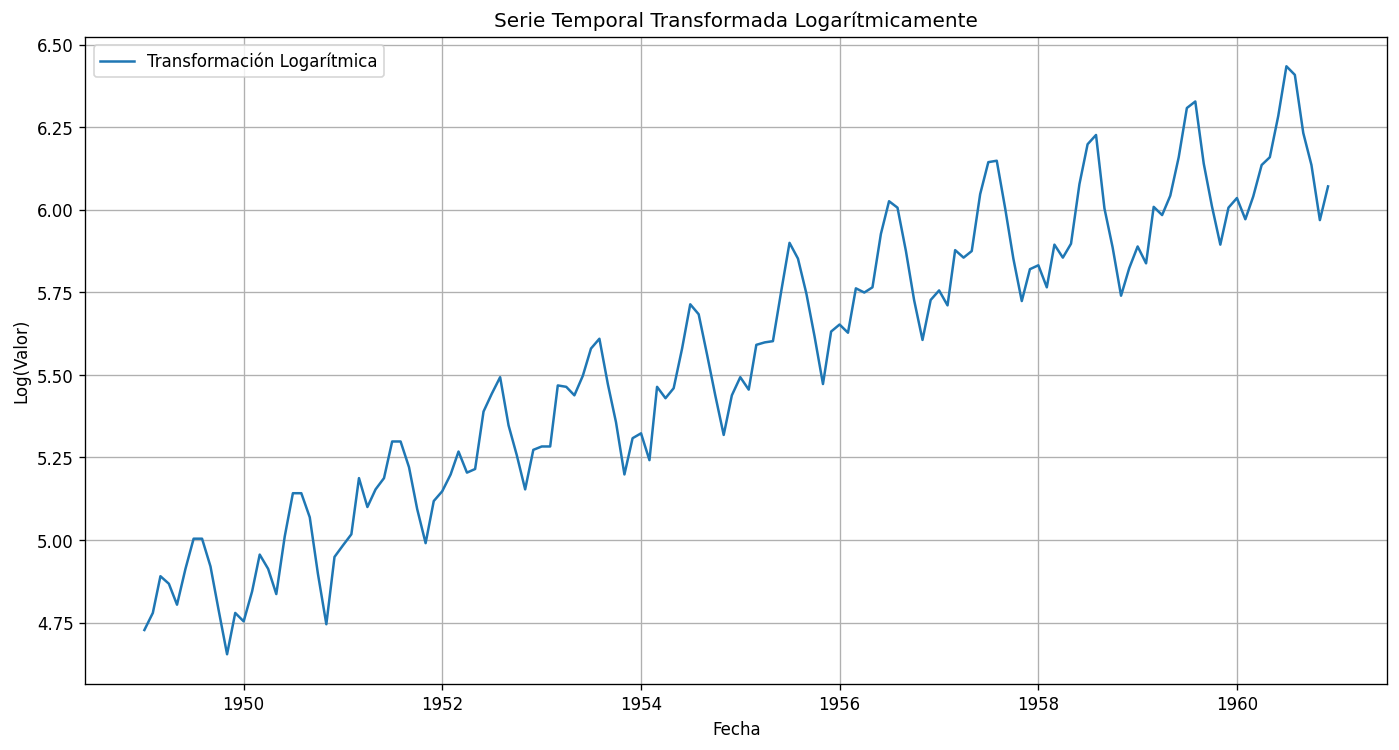

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Log_Valor'], label='Transformación Logarítmica')
plt.title('Serie Temporal Transformada Logarítmicamente')
plt.xlabel('Fecha')
plt.ylabel('Log(Valor)')
plt.legend()
plt.grid(True)

## 5. Divide en train y test. Guarda 20 muestras para test.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      144 non-null    int64  
 1   media      133 non-null    float64
 2   Log_Valor  144 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [11]:
x = df['value'].values
train = x[:124]
test = x[124:]

## 6. Crea tu primer modelo ARIMA

No podemos ya que hay problemas de compatibilidad entre librerías y ARIMA, tratamos de hacer un entorno virtual pero aún así.

In [13]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
model_ar = ARIMA(order=(1,0,0))
model_ar.fit(train)
predictions = model_ar.predict(20)
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

root_mean_squared_error: 140.91337741119193


## 7. Representa en una gráfica los datos de test y tus predicciones.

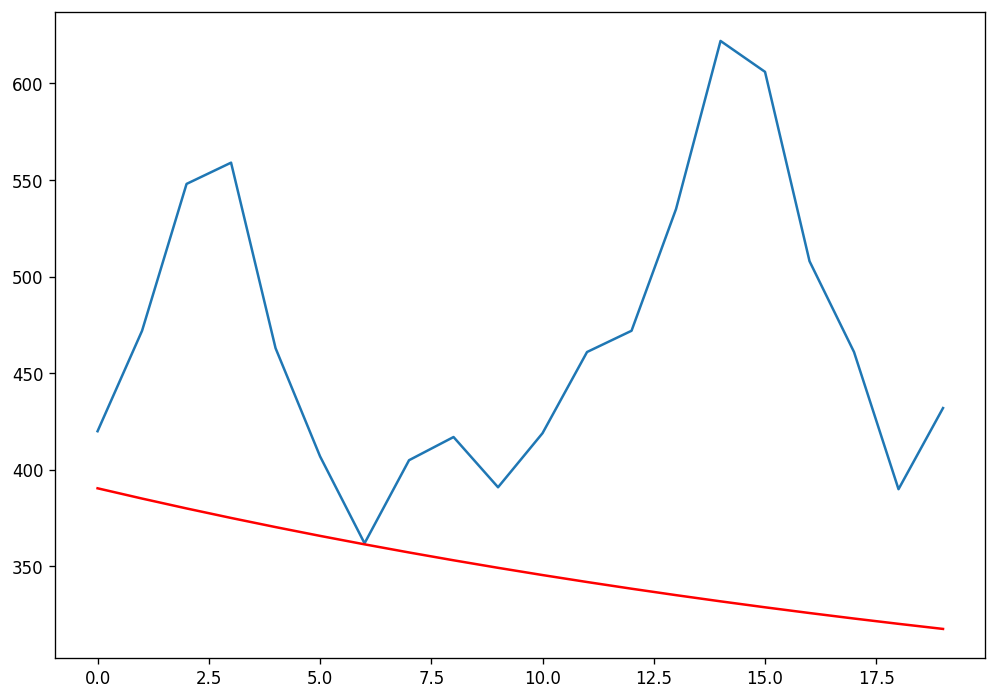

In [16]:
plt.plot(test)
plt.plot(predictions,color='red');

## 8. Prueba otros modelos supervisados, a ver qué performance presentan.